<a href="https://colab.research.google.com/github/junaidjdp/MSBA/blob/main/CLV_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
!pwd

/content


In [77]:
import pandas as pd

#importing dataset
campaign_desc = pd.read_csv("drive/My Drive/Colab Notebooks/dunnhumby_The-Complete-Journey/dunnhumby_The-Complete-Journey CSV/campaign_desc.csv")
campaign_table = pd.read_csv("drive/My Drive/Colab Notebooks/dunnhumby_The-Complete-Journey/dunnhumby_The-Complete-Journey CSV/campaign_table.csv")
causal_data = pd.read_csv("drive/My Drive/Colab Notebooks/dunnhumby_The-Complete-Journey/dunnhumby_The-Complete-Journey CSV/causal_data.csv")
coupon_redempt = pd.read_csv("drive/My Drive/Colab Notebooks/dunnhumby_The-Complete-Journey/dunnhumby_The-Complete-Journey CSV/coupon_redempt.csv")
coupon = pd.read_csv("drive/My Drive/Colab Notebooks/dunnhumby_The-Complete-Journey/dunnhumby_The-Complete-Journey CSV/coupon.csv")
hh_demographic = pd.read_csv("drive/My Drive/Colab Notebooks/dunnhumby_The-Complete-Journey/dunnhumby_The-Complete-Journey CSV/hh_demographic.csv")
product = pd.read_csv("drive/My Drive/Colab Notebooks/dunnhumby_The-Complete-Journey/dunnhumby_The-Complete-Journey CSV/product.csv")
transaction_data = pd.read_csv("drive/My Drive/Colab Notebooks/dunnhumby_The-Complete-Journey/dunnhumby_The-Complete-Journey CSV/transaction_data.csv")

In [78]:
campaign_desc['days'] = campaign_desc['END_DAY']-campaign_desc['START_DAY']
campaign_desc.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,days
0,TypeB,24,659,719,60
1,TypeC,15,547,708,161
2,TypeB,25,659,691,32
3,TypeC,20,615,685,70
4,TypeB,23,646,684,38


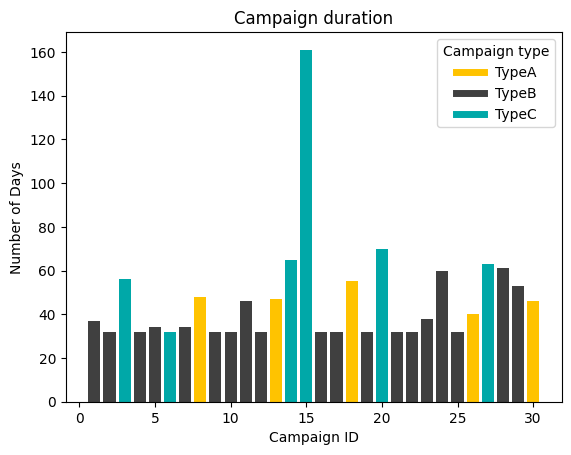

In [79]:
import matplotlib.pyplot as plt

# Using a colormap to get a list of colors
# cmap = plt.cm.get_cmap("tab20", len(campaign_desc['CAMPAIGN']))
# colors = [cmap(i) for i in range(len(campaign_desc['CAMPAIGN']))]
# Define a color mapping based on the unique values of the third column
color_map = {
    'TypeA': '#ffc300',
    'TypeB': '#404040',
    'TypeC': '#00a8a8'
}

# Get colors for each bar based on the third column
colors = [color_map[val] for val in campaign_desc['DESCRIPTION']]

# Add legend to indicate color significance
handles = [plt.Line2D([0], [0], color=color_map[key], label=key, markersize=10, lw=5) for key in color_map]
plt.legend(handles=handles, title="Campaign type")

# Create the bar plot
plt.bar(campaign_desc['CAMPAIGN'], campaign_desc['days'], color=colors)

# Add labels and title
plt.xlabel('Campaign ID')
plt.ylabel('Number of Days')
plt.title('Campaign duration')

# Display the plot
plt.show()

In [80]:
campaign_desc.DESCRIPTION.value_counts()

TypeB    19
TypeC     6
TypeA     5
Name: DESCRIPTION, dtype: int64

In [81]:
campaign_table.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [82]:
campaign_table.household_key.nunique()

1584

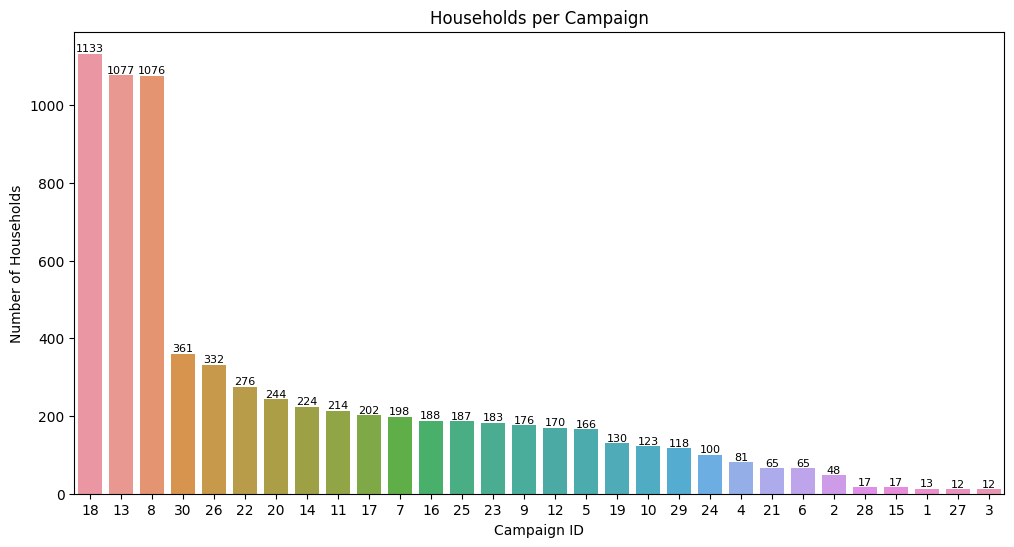

In [83]:
import seaborn as sns

plt.figure(figsize=(12, 6))

# Using seaborn's countplot function
ax = sns.countplot(data=campaign_table, x='CAMPAIGN', order=campaign_table['CAMPAIGN'].value_counts().index)

# Add labels and title
plt.xlabel('Campaign ID')
plt.ylabel('Number of Households')
plt.title('Households per Campaign')

# Annotate each bar with its respective value
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=8, ha='center', va='bottom')

# Display the plot
plt.show()

In [84]:
coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


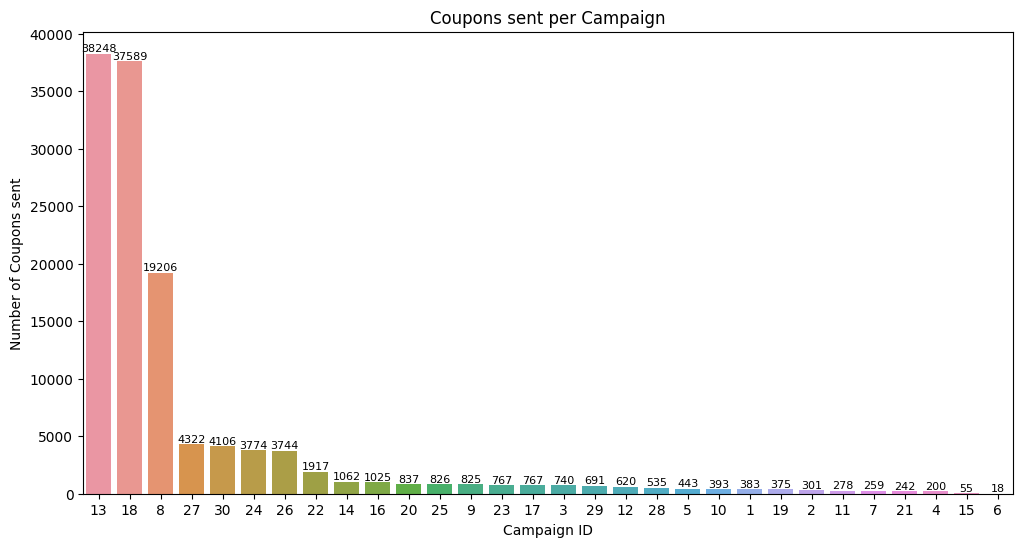

In [85]:
plt.figure(figsize=(12, 6))

# Using seaborn's countplot function
ax = sns.countplot(data=coupon, x='CAMPAIGN', order=coupon['CAMPAIGN'].value_counts().index)

# Add labels and title
plt.xlabel('Campaign ID')
plt.ylabel('Number of Coupons sent')
plt.title('Coupons sent per Campaign')

# Annotate each bar with its respective value
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=8, ha='center', va='bottom')

# Display the plot
plt.show()

In [86]:
coupon_redempt.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [87]:
coupon_redempt.household_key.nunique()

434

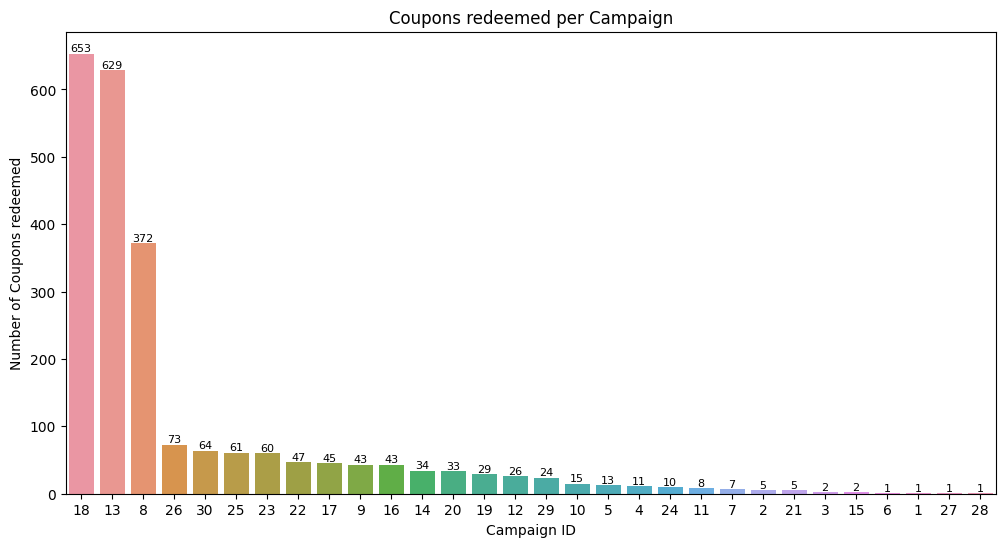

In [88]:
plt.figure(figsize=(12, 6))

# Using seaborn's countplot function
ax = sns.countplot(data=coupon_redempt, x='CAMPAIGN', order=coupon_redempt['CAMPAIGN'].value_counts().index)

# Add labels and title
plt.xlabel('Campaign ID')
plt.ylabel('Number of Coupons redeemed')
plt.title('Coupons redeemed per Campaign')

# Annotate each bar with its respective value
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=8, ha='center', va='bottom')

# Display the plot
plt.show()

In [89]:
coupon_sent = pd.DataFrame()
coupon_redeemed = pd.DataFrame()


In [90]:
# Get value counts
value_counts = coupon_redempt['CAMPAIGN'].value_counts()

# Convert to DataFrame
coupon_redeemed = value_counts.reset_index()
coupon_redeemed.columns = ['CAMPAIGN', 'Redeemed']

# Get value counts
value_counts_coupon = coupon['CAMPAIGN'].value_counts()

# Convert to DataFrame
coupon_sent = value_counts_coupon.reset_index()
coupon_sent.columns = ['CAMPAIGN', 'Sent']

In [91]:
# coupon_sent

In [92]:
coupon_redemption = pd.merge(coupon_sent, coupon_redeemed, on='CAMPAIGN')
coupon_redemption['Redemption_Percent'] = (coupon_redemption['Redeemed']*100)/coupon_redemption['Sent']

In [93]:
coupon_redemption['Redemption_Percent'] = coupon_redemption['Redemption_Percent'].map('{:,.2f}%'.format)
# coupon_redemption

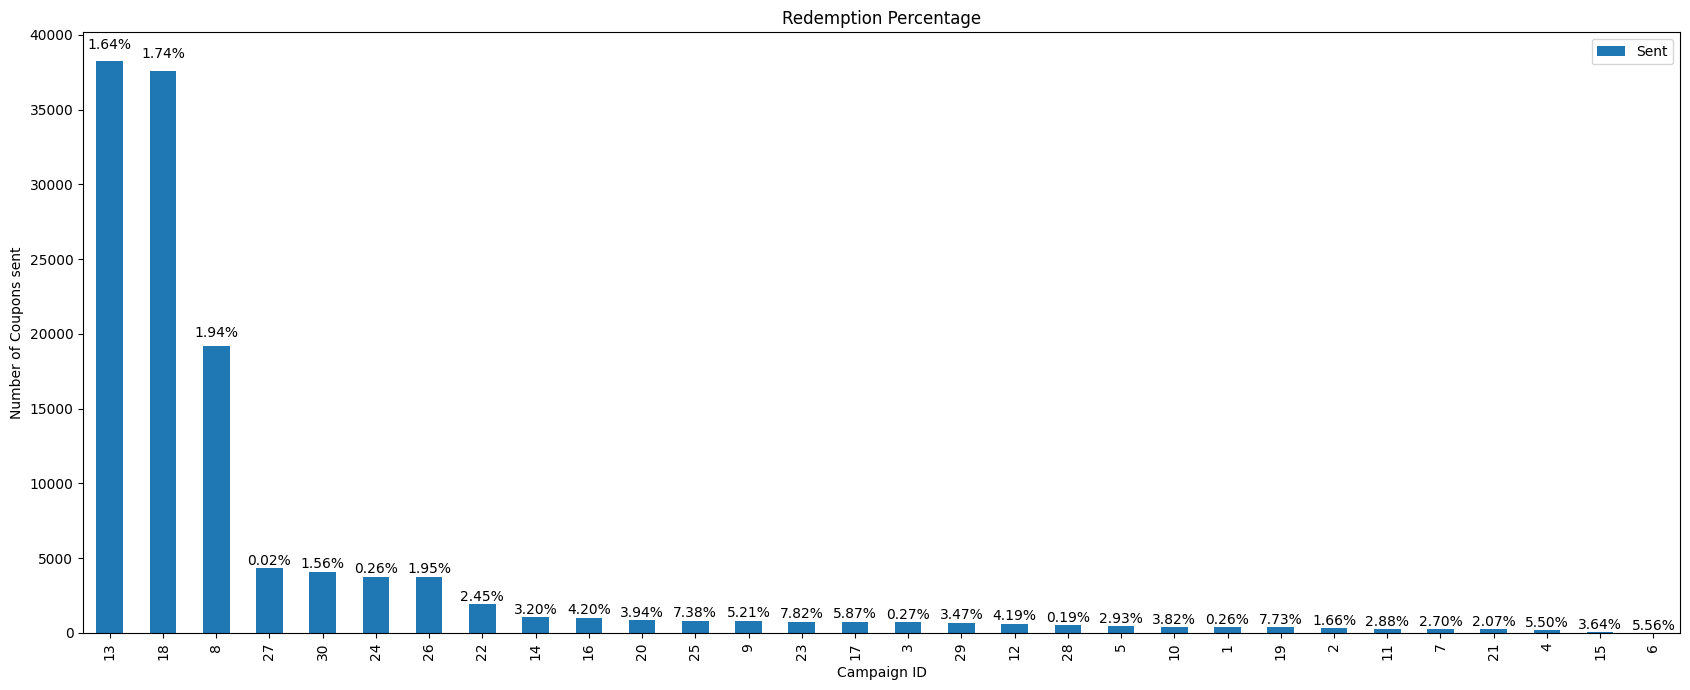

In [94]:
# Create a stacked bar chart
ax = coupon_redemption.plot(kind='bar', stacked=False, x='CAMPAIGN', y=['Sent'], figsize=(17,7))

# Add labels and title
plt.xlabel('Campaign ID')
plt.ylabel('Number of Coupons sent')
plt.title('Redemption Percentage')

# Display the label values on top of the bars
for i, (value1, value2, label) in enumerate(zip(coupon_redemption['Sent'], coupon_redemption['Redeemed'], coupon_redemption['Redemption_Percent'])):
    # plt.text(i, value1/2, str(value1), ha='center', va='center', color='white')
    # plt.text(i, value1 + value2/2, str(value2), ha='center', va='center', color='white')
    plt.text(i, value1 + value2, str(label), ha='center', va='bottom')

# # Display the label values on top of the bars
# for i, (value1, value2, label) in enumerate(zip(coupon_redemption['Sent'], coupon_redemption['Redeemed'], coupon_redemption['Redemption_Percent'])):
#     plt.text(i, value1/2, str(value1), ha='center', va='center', color='white')
#     plt.text(i, value1 + value2/2, str(value2), ha='center', va='center', color='white')
#     plt.text(i, label, str(label), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [95]:
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [96]:
# transaction_data['CUSTOMER_PAID'] = transaction_data['SALES_VALUE']-(transaction_data['RETAIL_DISC']+transaction_data['COUPON_MATCH_DISC'])
# transaction_data['RETAILER_REVENUE'] = transaction_data['SALES_VALUE']-(transaction_data['RETAIL_DISC']+transaction_data['COUPON_MATCH_DISC'])

In [97]:
trans_data_baskets_hh_key = pd.DataFrame(transaction_data.groupby(['household_key', 'BASKET_ID']).sum()).drop(['DAY', 'PRODUCT_ID',
                                                                                                               'STORE_ID', 'RETAIL_DISC',
                                                                                                               'TRANS_TIME', 'WEEK_NO', 'COUPON_DISC',
                                                                                                               'COUPON_MATCH_DISC'], axis=1)
trans_data_baskets_hh_key = trans_data_baskets_hh_key.merge(transaction_data.drop(['SALES_VALUE', 'PRODUCT_ID', 'QUANTITY',
                                                                                   'RETAIL_DISC', 'COUPON_DISC',
                                                                                   'COUPON_MATCH_DISC'], axis=1),
                                                            on="BASKET_ID").drop_duplicates(subset=['BASKET_ID'])
trans_data_baskets_hh_key.head()

,BASKET_ID,QUANTITY,SALES_VALUE,household_key,DAY,STORE_ID,TRANS_TIME,WEEK_NO
0,27601281299,34,78.66,1,51,436,1456,8
30,27774192959,14,41.10,1,67,436,2002,10
42,28024266849,13,26.90,1,88,436,1604,13
54,28106322445,32,63.43,1,94,436,1937,14
77,28235481967,20,53.45,1,101,436,1603,15


In [98]:
# Avg customer value
acv = round((trans_data_baskets_hh_key.groupby(['household_key']).sum()).SALES_VALUE.mean(),2)
acv

3222.99

In [99]:
# Avg count of total unique items per household
(transaction_data.groupby(['household_key']).nunique())['PRODUCT_ID'].mean()

560.5876

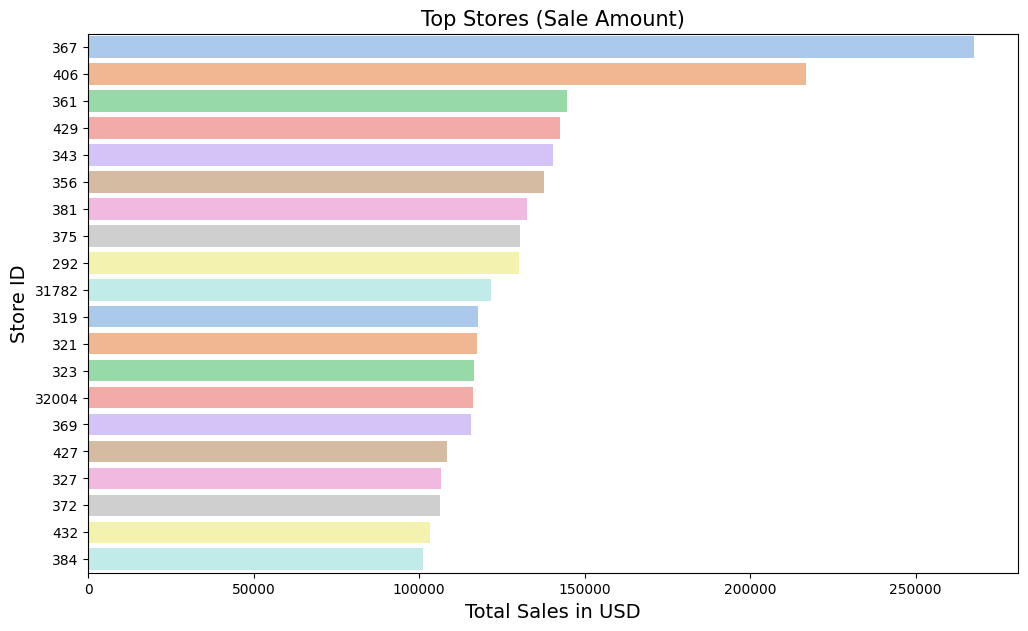

In [100]:
sales_per_store = transaction_data.groupby("STORE_ID").sum()["SALES_VALUE"].sort_values(ascending=False)
sales_per_store = pd.DataFrame(list(zip(sales_per_store.index,sales_per_store)),columns=["Store ID","Total Sales in USD"])
fig_store = plt.figure(figsize=(12,7))
sns.barplot(y="Store ID",x="Total Sales in USD",data = sales_per_store[:20],order=sales_per_store[:20]["Store ID"],orient="h",palette="pastel")
plt.title('Top Stores (Sale Amount)', fontsize=15)
plt.xlabel('Total Sales in USD', fontsize=14)
plt.ylabel('Store ID', fontsize=14)
plt.show()

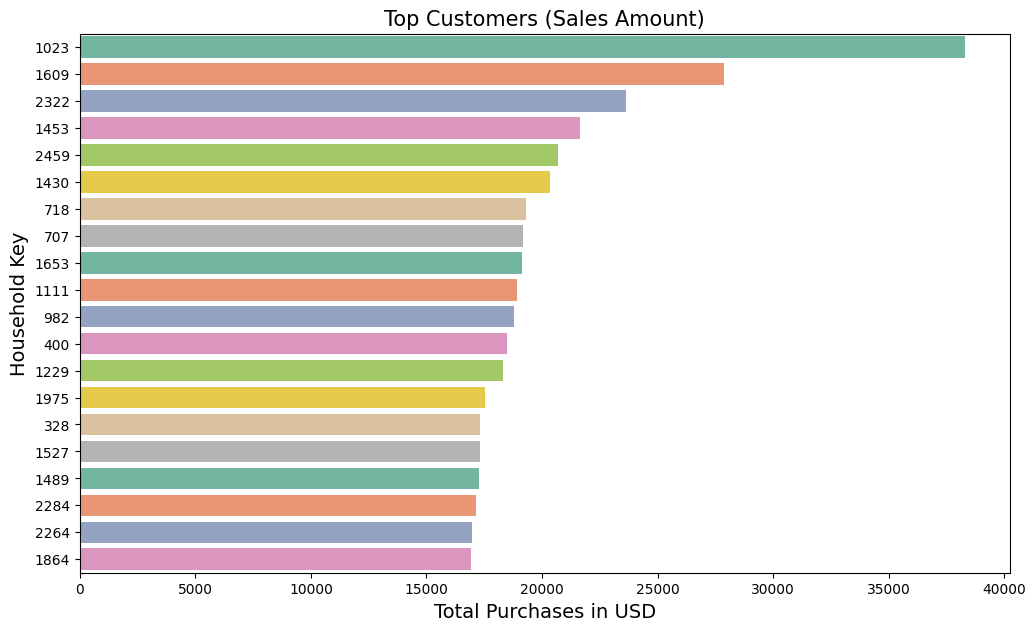

In [101]:
purc_per_cust = transaction_data.groupby("household_key").sum()["SALES_VALUE"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["household_key","Total Purchase in USD"])
fig_store = plt.figure(figsize=(12,7))
sns.barplot(y="household_key",x="Total Purchase in USD",data = purc_per_cust[:20],order=purc_per_cust[:20]["household_key"],orient="h",palette="Set2")
plt.title('Top Customers (Sales Amount)', fontsize=15)
plt.xlabel('Total Purchases in USD', fontsize=14)
plt.ylabel('Household Key', fontsize=14)
plt.show()

In [102]:
hh_demographic.head()

,classification_1,classification_2,classification_3,HOMEOWNER_DESC,classification_5,classification_4,KID_CATEGORY_DESC,household_key
0,Age Group6,X,Level4,Homeowner,Group5,2,None/Unknown,1
1,Age Group4,X,Level5,Homeowner,Group5,2,None/Unknown,7
2,Age Group2,Y,Level3,Unknown,Group4,3,1,8
3,Age Group2,Y,Level6,Homeowner,Group4,4,2,13
4,Age Group4,Z,Level5,Homeowner,Group3,1,None/Unknown,16


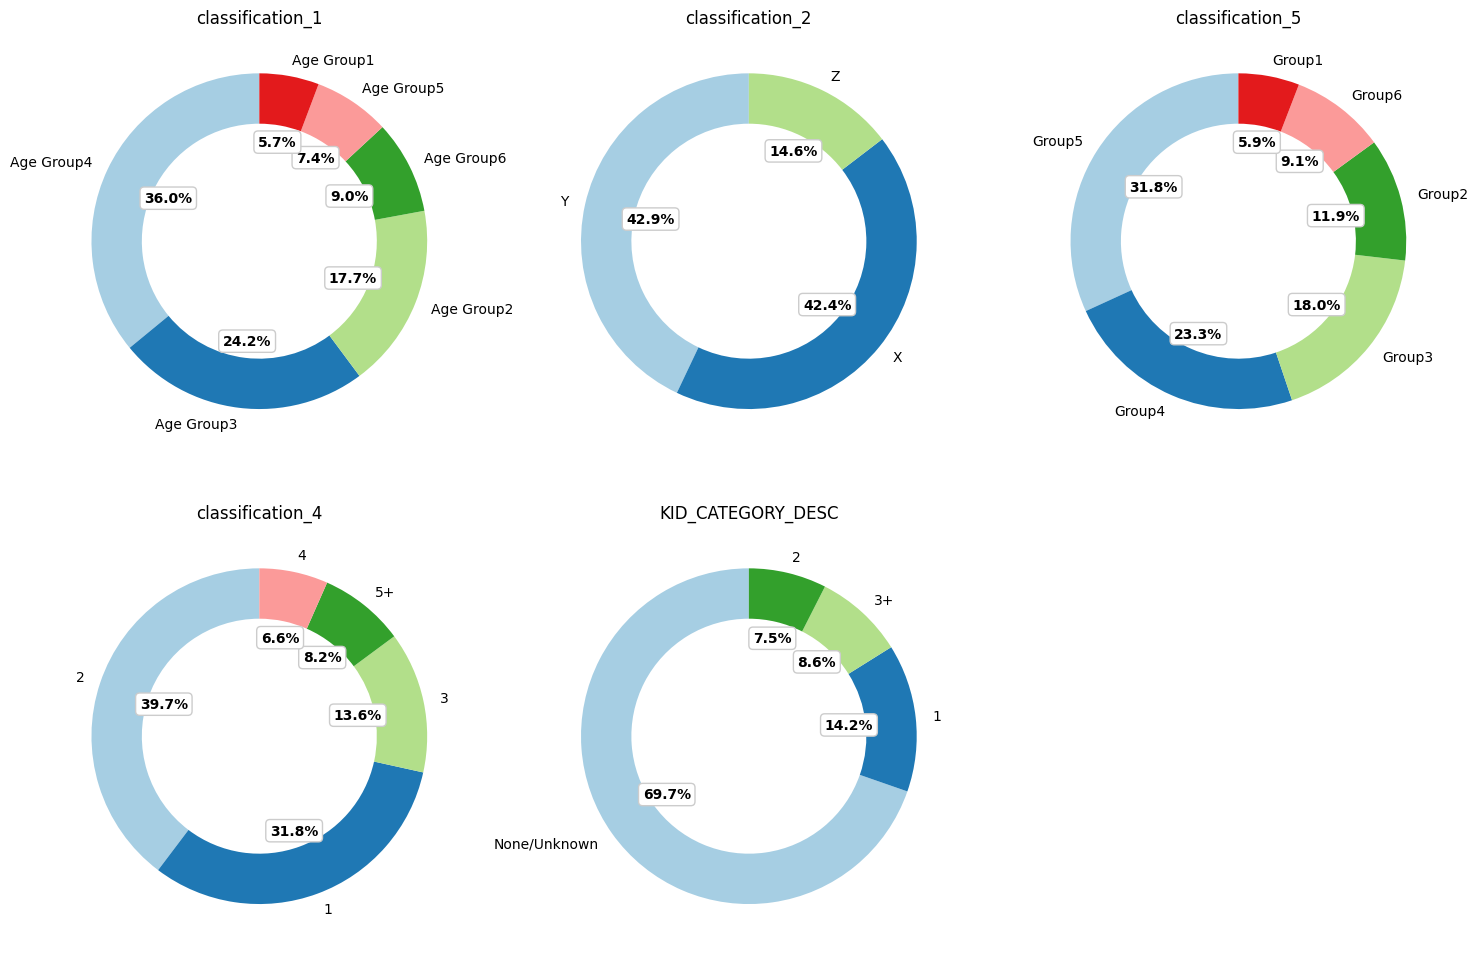

In [103]:
# Define individual titles for each subplot
titles = hh_demographic.drop(['household_key','classification_3','HOMEOWNER_DESC'],axis=1).columns

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()  # Flatten the axis array for easier iteration

# Create a donut chart for each categorical column
for idx, (column, title) in enumerate(zip(hh_demographic.drop(['household_key','classification_3','HOMEOWNER_DESC'],axis=1).columns, titles)):
    # Get value counts for the current column
    category_counts = hh_demographic[column].value_counts()

    # Compute percentage for each category
    n_total = len(hh_demographic)
    percentages = [(count/n_total)*100 for count in category_counts]

    # Define colors for the chart
    colors = plt.cm.Paired(range(len(category_counts)))

    # Plot the donut chart on the respective subplot
    wedges, texts, autotexts = axs[idx].pie(category_counts, labels=category_counts.index, colors=colors, startangle=90,
                                            autopct='%1.1f%%', wedgeprops=dict(width=0.3))

    # Set title for the subplot
    axs[idx].set_title(title)

    # Aesthetic tweaks
    for t in texts:
        t.set(size=10)
    for at in autotexts:
        at.set(size=10, weight='bold')
        at.set_bbox(dict(boxstyle="round,pad=0.3", edgecolor="0.8", facecolor="white"))  # Use bounding box to space out text

# Remove any unused subplots
for idx in range(len(hh_demographic.drop(['household_key','classification_3','HOMEOWNER_DESC'],axis=1).columns), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()

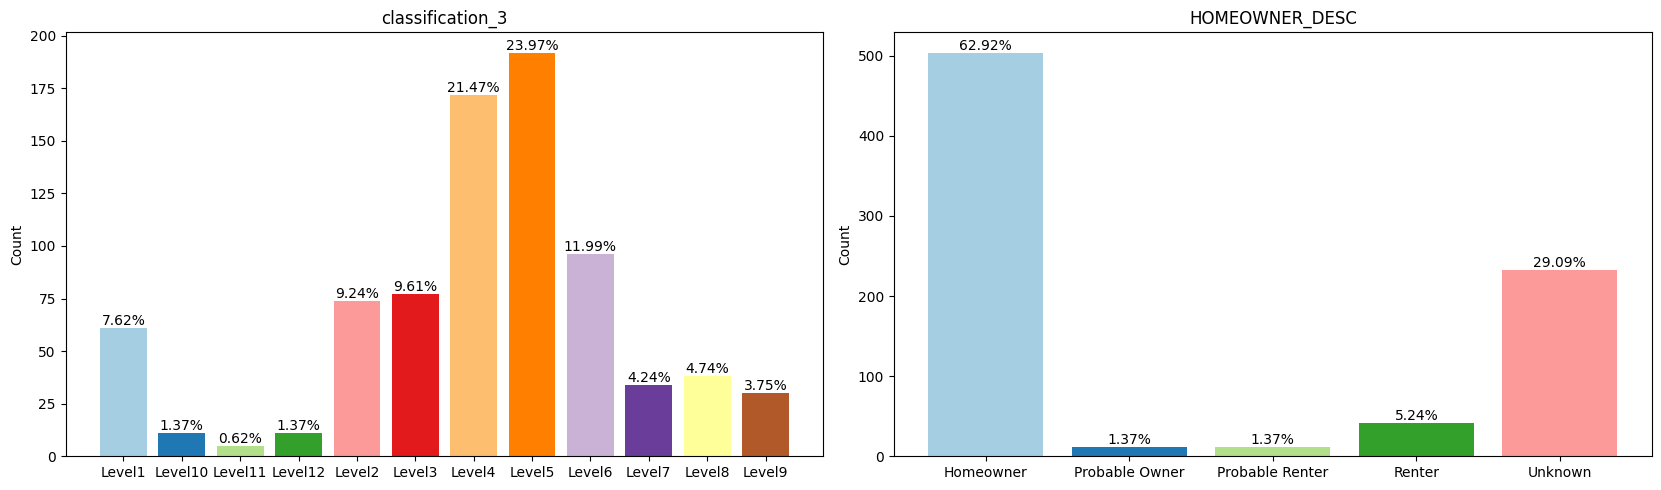

In [104]:
# Define individual titles for each subplot
titles = ['classification_3','HOMEOWNER_DESC']

fig, axs = plt.subplots(1, 3, figsize=(25, 5))
axs = axs.ravel()  # Flatten the axis array for easier iteration

# Create a bar chart for each categorical column
for idx, (column, title) in enumerate(zip(hh_demographic[['classification_3','HOMEOWNER_DESC']].columns, titles)):
    # Get value counts for the current column
    category_counts = hh_demographic[column].value_counts()
    category_counts = category_counts.sort_index()  # Sort by category for consistent coloring

    # Plot the bar chart on the respective subplot
    bars = axs[idx].bar(category_counts.index, category_counts, color=plt.cm.Paired(range(len(category_counts))))

    # Compute total counts to calculate percentage
    total = category_counts.sum()

    # Annotate each bar with its percentage value
    for bar in bars:
        yval = bar.get_height()
        percentage = (yval / total) * 100
        axs[idx].text(bar.get_x() + bar.get_width()/2, yval, f"{percentage:.2f}%",
                      ha='center', va='bottom', fontsize=10)

    # Set title and adjust aesthetics
    axs[idx].set_title(title)
    axs[idx].set_ylabel('Count')

# Remove any unused subplots
for idx in range(len(hh_demographic[['classification_3','HOMEOWNER_DESC']].columns), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


In [105]:
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [106]:
model_txn_data = transaction_data[['household_key','BASKET_ID','DAY','QUANTITY','WEEK_NO','SALES_VALUE']]

In [107]:
model_txn_data.dtypes

household_key      int64
BASKET_ID          int64
DAY                int64
QUANTITY           int64
WEEK_NO            int64
SALES_VALUE      float64
dtype: object

In [108]:
import random
from collections import defaultdict

# Helper function to convert day number to year and month
def day_to_year_month(day_num):
    # Assuming a non-leap year for simplicity
    month_lengths = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31] * 2
    year = 1 if day_num <= 365 else 2
    month = 1
    while day_num > month_lengths[month-1]:
        day_num -= month_lengths[month-1]
        month += 1
    return year, month

# Step 2: Calculate monthly revenue from the DataFrame
monthly_revenue = defaultdict(float)

for index, row in model_txn_data.iterrows():
    day_num = row['DAY']
    year, month = day_to_year_month(day_num)
    month_key = (year, month)
    monthly_revenue[month_key] += row['SALES_VALUE']

# Display monthly revenue
# for (year, month), revenue in monthly_revenue.items():
#     print(f"Revenue for Month {month} in Year {year}: ${revenue:.2f}")

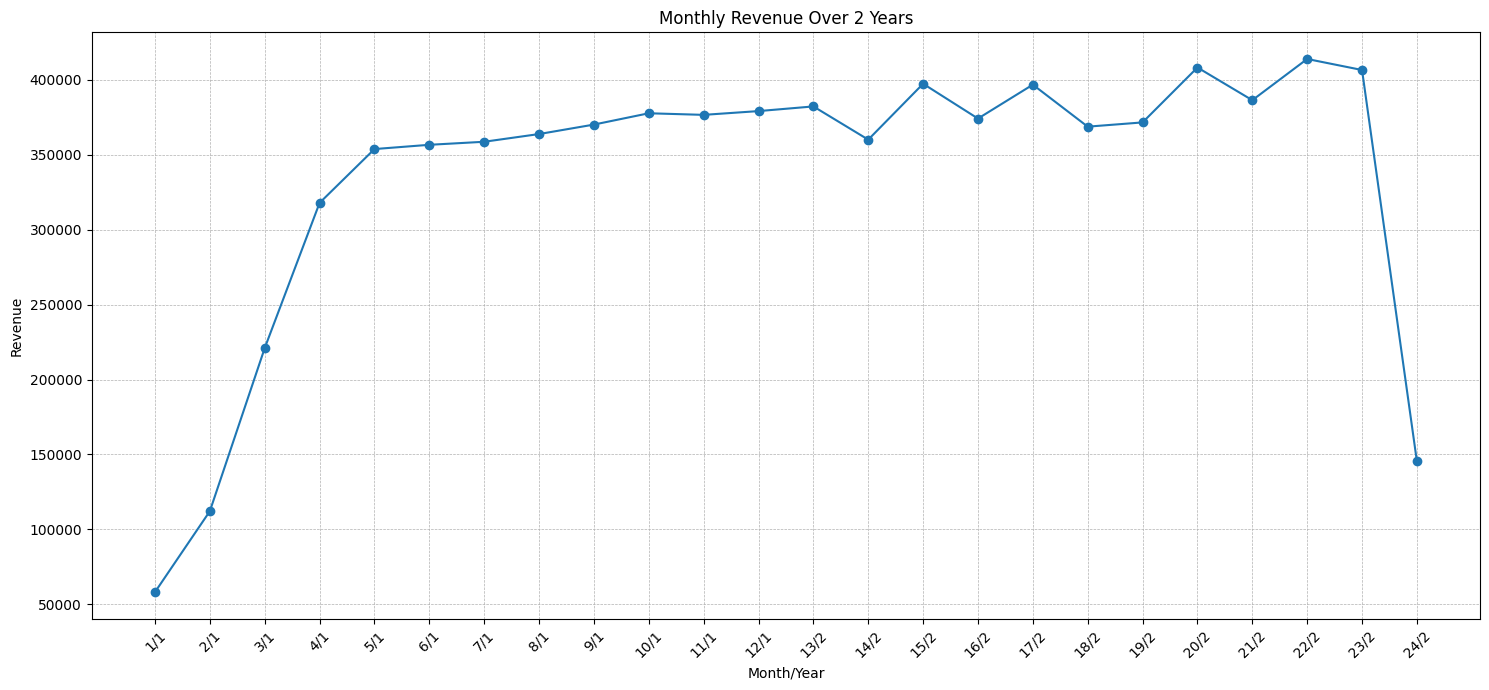

In [109]:
# Sort monthly_revenue by year and month for plotting
sorted_keys = sorted(monthly_revenue.keys(), key=lambda x: (x[0], x[1]))
sorted_revenues = [monthly_revenue[key] for key in sorted_keys]

# Convert (year, month) keys to string for x-axis labels
labels = [f"{month}/{year}" for year, month in sorted_keys]

# Plotting the data
plt.figure(figsize=(15, 7))
plt.plot(labels, sorted_revenues, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Month/Year")
plt.ylabel("Revenue")
plt.title("Monthly Revenue Over 2 Years")
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

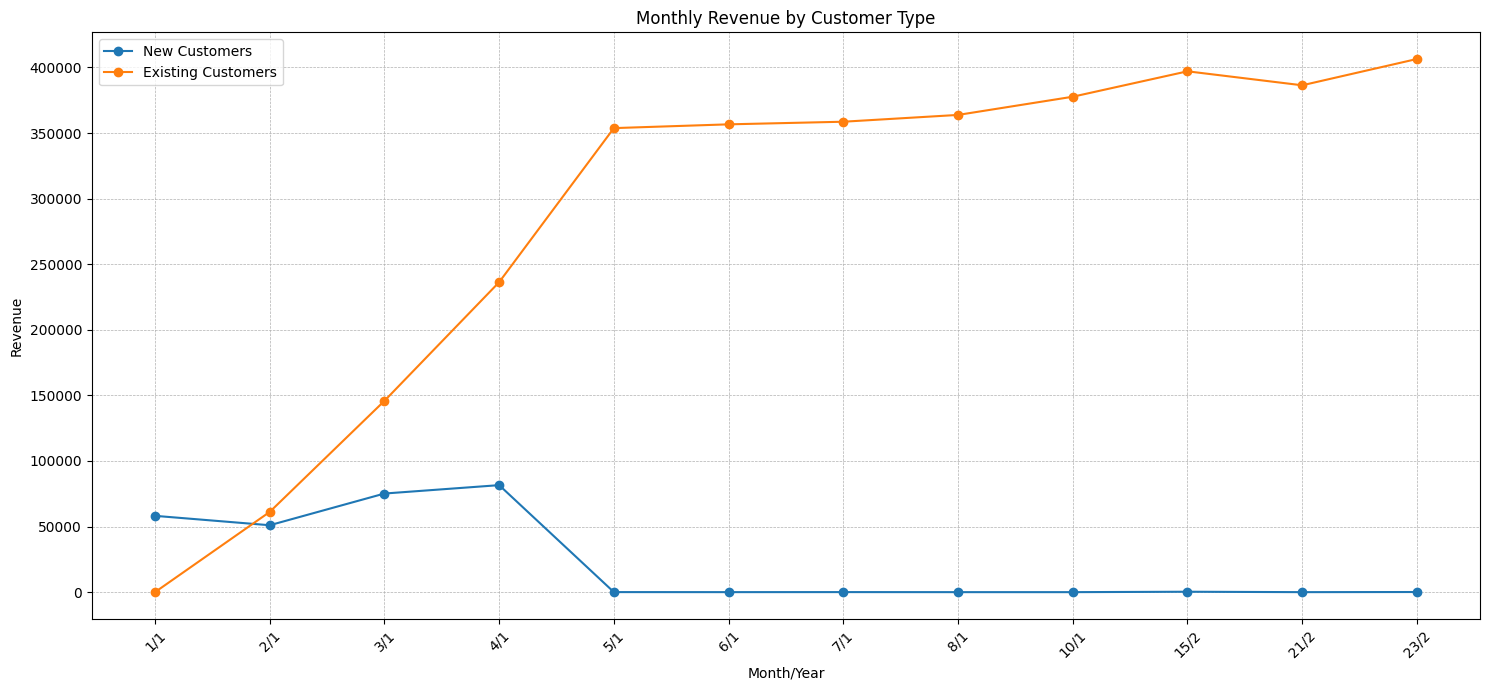

In [110]:
# Identify the first month for each customer
customer_first_month = {}
for _, row in model_txn_data.iterrows():
    year, month = day_to_year_month(row['DAY'])
    month_key = (year, month)
    if row['household_key'] not in customer_first_month:
        customer_first_month[row['household_key']] = month_key

# Calculate monthly revenue from new and existing customers
revenue_new_customers = defaultdict(float)
revenue_existing_customers = defaultdict(float)

for _, row in model_txn_data.iterrows():
    day_num = row['DAY']
    year, month = day_to_year_month(day_num)
    month_key = (year, month)

    # Check if the customer is new for the month
    if customer_first_month[row['household_key']] == month_key:
        revenue_new_customers[month_key] += row['SALES_VALUE']
    else:
        revenue_existing_customers[month_key] += row['SALES_VALUE']

# Plotting
sorted_keys = sorted(revenue_new_customers.keys(), key=lambda x: (x[0], x[1]))
revenues_new = [revenue_new_customers[key] for key in sorted_keys]
revenues_existing = [revenue_existing_customers[key] for key in sorted_keys]

labels = [f"{month}/{year}" for year, month in sorted_keys]

plt.figure(figsize=(15, 7))
plt.plot(labels, revenues_new, marker='o', linestyle='-', label='New Customers')
plt.plot(labels, revenues_existing, marker='o', linestyle='-', label='Existing Customers')
plt.xticks(rotation=45)
plt.xlabel("Month/Year")
plt.ylabel("Revenue")
plt.title("Monthly Revenue by Customer Type")
plt.tight_layout()
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [111]:
# Calculate Recency
# Find the last transaction day in the dataset
last_transaction_day = model_txn_data['DAY'].max()

# For each customer, determine the day of their most recent transaction
recency = model_txn_data.groupby('household_key')['DAY'].max()
recency = last_transaction_day - recency

# Calculate Frequency
frequency = model_txn_data.groupby('household_key').size()

# Calculate Monetary
monetary = model_txn_data.groupby('household_key')['SALES_VALUE'].sum()

# Combine Recency, Frequency, and Monetary into an RFM DataFrame
df_rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
}).reset_index()

df_rfm.head()

,household_key,Recency,Frequency,Monetary
0,1,5,1727,4330.16
1,2,43,714,1954.34
2,3,8,922,2653.21
3,4,84,301,1200.11
4,5,8,222,779.06


In [112]:
df_rfm[df_rfm.Frequency	== 1]

,household_key,Recency,Frequency,Monetary


In [113]:
#Find out missing values
transaction_data.isnull().sum(axis=0)

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [114]:
transaction_data['DAY'].describe()

count    2.595732e+06
mean     3.887562e+02
std      1.897210e+02
min      1.000000e+00
25%      2.290000e+02
50%      3.900000e+02
75%      5.530000e+02
max      7.110000e+02
Name: DAY, dtype: float64

In [115]:
#create 3m and 6m dataframes
tx_18m = transaction_data[(transaction_data.DAY < 540)].reset_index(drop=True)
tx_6m = transaction_data[(transaction_data.DAY >= 540)].reset_index(drop=True)

In [116]:
# For 18 months historical data
# Calculate Recency
# Find the last transaction day in the dataset
last_transaction_day_18m = tx_18m['DAY'].max()

# For each customer, determine the day of their most recent transaction
recency = tx_18m.groupby('household_key')['DAY'].max()
recency = last_transaction_day_18m - recency

# Calculate Frequency
frequency = tx_18m.groupby('household_key').size()

# Calculate Monetary
monetary = tx_18m.groupby('household_key')['SALES_VALUE'].sum()

# Combine Recency, Frequency, and Monetary into an RFM DataFrame
df_rfm_18m = pd.DataFrame({
    'Recency_18m': recency,
    'Frequency_18m': frequency,
    'Monetary_18m': monetary
}).reset_index()

df_rfm_18m.head()

,household_key,Recency_18m,Frequency_18m,Monetary_18m
0,1,1,1207,3052.74
1,2,50,492,1385.24
2,3,7,855,2518.80
3,4,43,270,1058.18
4,5,18,199,650.72


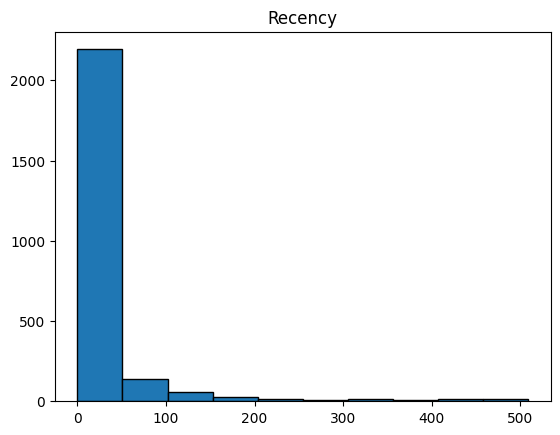

In [117]:
# Plot histogram
plt.hist(df_rfm_18m['Recency_18m'], bins=10, edgecolor='black')
plt.title('Recency')
plt.show()

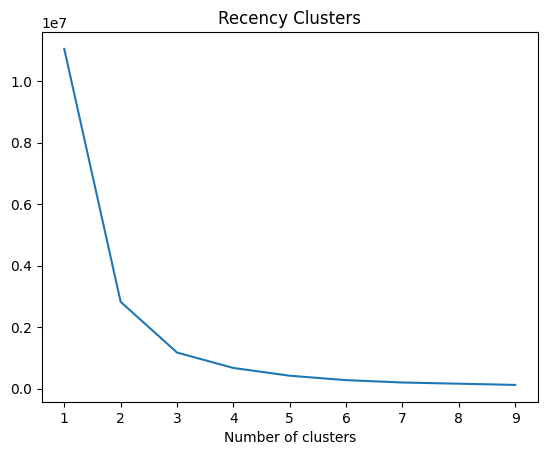

In [118]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

sse={}
tx_recency_18m = df_rfm_18m[['Recency_18m']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency_18m)
    tx_recency_18m["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.title('Recency Clusters')
plt.show()

In [119]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_rfm_18m[['Recency_18m']])
df_rfm_18m['RecencyCluster'] = kmeans.predict(df_rfm_18m[['Recency_18m']])
df_rfm_18m.head()

,household_key,Recency_18m,Frequency_18m,Monetary_18m,RecencyCluster
0,1,1,1207,3052.74,3
1,2,50,492,1385.24,0
2,3,7,855,2518.80,3
3,4,43,270,1058.18,0
4,5,18,199,650.72,3


In [120]:
#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [121]:
df_rfm_18m = order_cluster('RecencyCluster', 'Recency_18m', df_rfm_18m, False)

In [122]:
# Define custom aggregation function
def statistics(x):
    return {
        'count': x.count(),
        'min': x.min(),
        'max': x.max(),
        'std': x.std(),
        '25th percentile': x.quantile(0.25),
        'median': x.median(),
        '75th percentile': x.quantile(0.75)
    }

pivot = df_rfm_18m.groupby('RecencyCluster')['Recency_18m'].apply(statistics).unstack()

print(pivot)

                 count    min    max        std  25th percentile  median  \
RecencyCluster                                                             
0                 50.0  303.0  509.0  62.883595           343.75   419.5   
1                 97.0  117.0  288.0  47.911787           132.00   162.0   
2                295.0   33.0  115.0  22.052651            40.00    51.0   
3               2056.0    0.0   32.0   7.546278             1.00     4.0   

                75th percentile  
RecencyCluster                   
0                         464.0  
1                         204.0  
2                          73.0  
3                           9.0  


In [123]:
df_rfm_18m.tail()

,household_key,Recency_18m,Frequency_18m,Monetary_18m,RecencyCluster
2493,2315,420,23,141.79,0
2494,2339,343,91,228.20,0
2495,2365,314,120,313.65,0
2496,2404,378,59,145.76,0
2497,2444,509,3,13.86,0


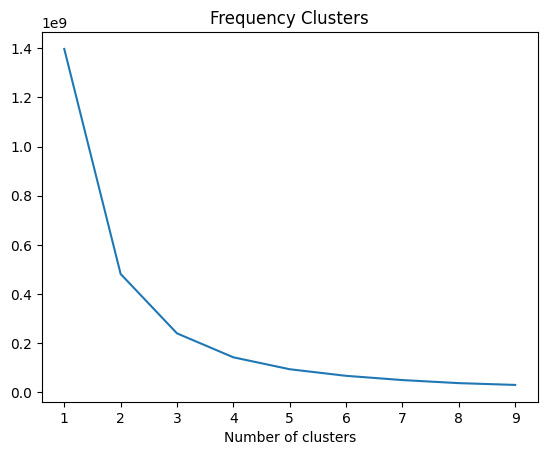

In [124]:
sse={}
tx_frequency_18m = df_rfm_18m[['Frequency_18m']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency_18m)
    tx_frequency_18m["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.title('Frequency Clusters')
plt.show()

In [125]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_rfm_18m[['Frequency_18m']])
df_rfm_18m['FrequencyCluster'] = kmeans.predict(df_rfm_18m[['Frequency_18m']])
df_rfm_18m = order_cluster('FrequencyCluster', 'Frequency_18m', df_rfm_18m, True)
df_rfm_18m.head()

,household_key,Recency_18m,Frequency_18m,Monetary_18m,RecencyCluster,FrequencyCluster
0,1,1,1207,3052.74,3,1
1,3,7,855,2518.80,3,1
2,7,5,724,2008.07,3,1
3,14,12,693,2082.98,3,1
4,17,19,849,4427.35,3,1


In [126]:
pivot = df_rfm_18m.groupby('FrequencyCluster')['Frequency_18m'].apply(statistics).unstack()
print(pivot)

                   count     min     max         std  25th percentile  median  \
FrequencyCluster                                                                
0                 1281.0     1.0   547.0  153.299475           110.00   221.0   
1                  750.0   549.0  1276.0  209.025707           674.25   821.0   
2                  363.0  1280.0  2412.0  309.636965          1404.00  1659.0   
3                  104.0  2428.0  5778.0  664.409439          2676.00  2914.0   

                  75th percentile  
FrequencyCluster                   
0                          369.00  
1                         1027.75  
2                         1941.00  
3                         3393.50  


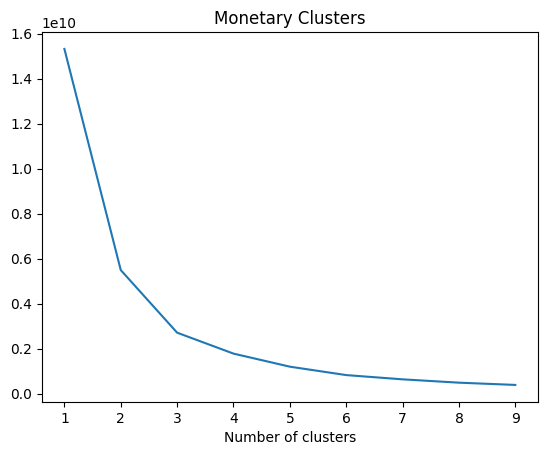

In [127]:
sse={}
tx_monetary_18m = df_rfm_18m[['Monetary_18m']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_monetary_18m)
    tx_monetary_18m["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.title('Monetary Clusters')
plt.show()

In [128]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_rfm_18m[['Monetary_18m']])
df_rfm_18m['MonetaryCluster'] = kmeans.predict(df_rfm_18m[['Monetary_18m']])
df_rfm_18m = order_cluster('MonetaryCluster', 'Monetary_18m', df_rfm_18m, True)
df_rfm_18m.head()

,household_key,Recency_18m,Frequency_18m,Monetary_18m,RecencyCluster,FrequencyCluster,MonetaryCluster
0,1,1,1207,3052.74,3,1,1
1,3,7,855,2518.80,3,1,1
2,7,5,724,2008.07,3,1,1
3,14,12,693,2082.98,3,1,1
4,23,4,612,2565.59,3,1,1


In [129]:
pivot = df_rfm_18m.groupby('MonetaryCluster')['Monetary_18m'].apply(statistics).unstack()
print(pivot)

                  count      min       max          std  25th percentile  \
MonetaryCluster                                                            
0                1309.0     3.55   1641.79   463.922485          338.040   
1                 719.0  1647.65   3906.42   648.532858         1980.585   
2                 361.0  3912.61   7765.10  1027.742010         4415.550   
3                 109.0  7840.71  25668.22  2750.942844         8819.490   

                  median  75th percentile  
MonetaryCluster                            
0                 699.69          1105.03  
1                2422.71          3093.80  
2                5070.76          5950.54  
3                9480.36         10976.61  


In [131]:
#calculate overall score and use mean() to see details
df_rfm_18m['OverallScore'] = df_rfm_18m['RecencyCluster'] + df_rfm_18m['FrequencyCluster'] + df_rfm_18m['MonetaryCluster']
df_rfm_18m.groupby('OverallScore')['Recency_18m','Frequency_18m','Monetary_18m'].mean()

,Recency_18m,Frequency_18m,Monetary_18m
OverallScore,,,
0,404.020000,83.640000,221.135400
1,175.857143,120.000000,375.522198
2,60.481781,173.194332,531.245951
3,11.340909,276.833732,815.051687
4,13.142132,606.137056,1756.790203
5,5.470696,867.095238,2565.040733
6,4.968992,1299.767442,3931.856822
7,3.901460,1719.375912,5359.625146
8,2.886364,2386.386364,7962.528636


In [161]:
df_rfm_18m['Segment'] = 'low_worth'
df_rfm_18m.loc[df_rfm_18m['OverallScore']>2,'Segment'] = 'mid_worth'
df_rfm_18m.loc[df_rfm_18m['OverallScore']>5,'Segment'] = 'high_worth'

In [162]:
df_rfm_18m.head()

,household_key,Recency_18m,Frequency_18m,Monetary_18m,RecencyCluster,FrequencyCluster,MonetaryCluster,Segment,OverallScore
0,1,1,1207,3052.74,3,1,1,mid_worth,5
1,3,7,855,2518.80,3,1,1,mid_worth,5
2,7,5,724,2008.07,3,1,1,mid_worth,5
3,14,12,693,2082.98,3,1,1,mid_worth,5
4,23,4,612,2565.59,3,1,1,mid_worth,5


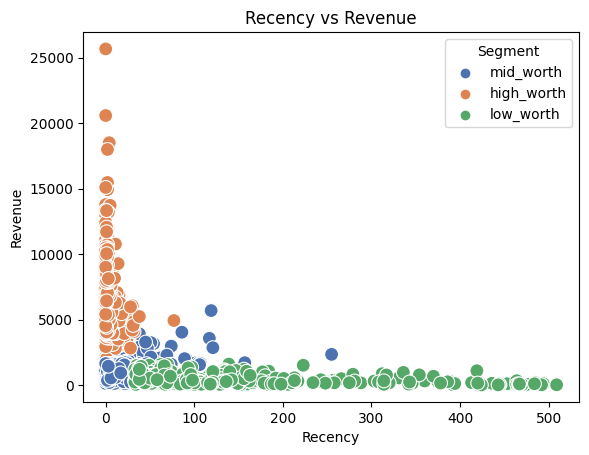

In [163]:
sns.scatterplot(data=df_rfm_18m, x='Recency_18m', y='Monetary_18m', hue='Segment', palette='deep', s=100)
plt.xlabel('Recency')
plt.ylabel('Revenue')
plt.title('Recency vs Revenue')
plt.show()

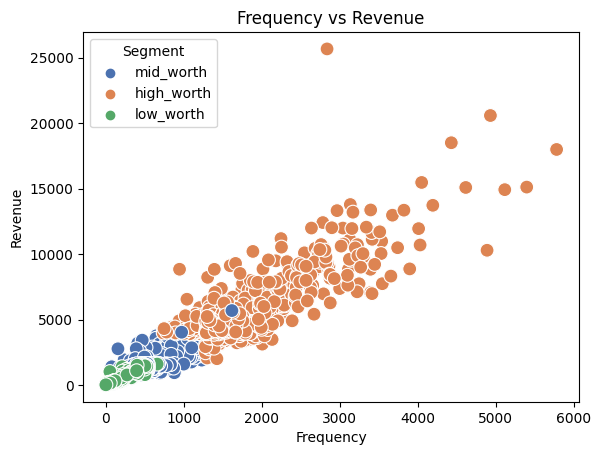

In [164]:
sns.scatterplot(data=df_rfm_18m, x='Frequency_18m', y='Monetary_18m', hue='Segment', palette='deep', s=100)
plt.xlabel('Frequency')
plt.ylabel('Revenue')
plt.title('Frequency vs Revenue')
plt.show()

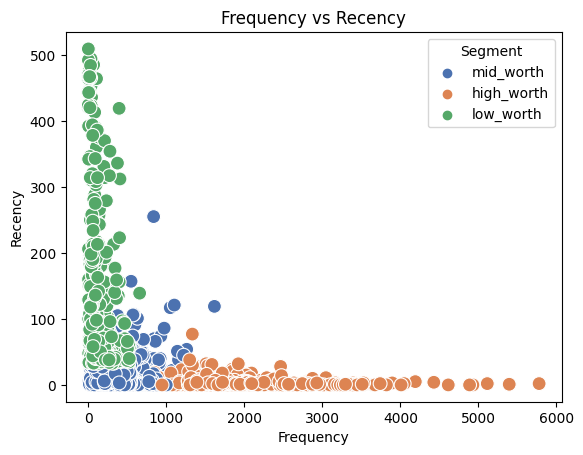

In [165]:
sns.scatterplot(data=df_rfm_18m, x='Frequency_18m', y='Recency_18m', hue='Segment', palette='deep', s=100)
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.title('Frequency vs Recency')
plt.show()

In [166]:
df_rfm_6m = tx_6m.groupby('household_key')['SALES_VALUE'].sum().reset_index()
df_rfm_6m.columns = ['household_key','m6_Revenue']

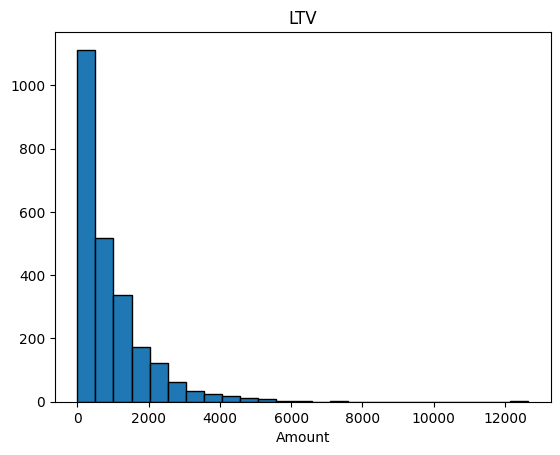

In [167]:
# Plot histogram
plt.hist(df_rfm_6m['m6_Revenue'], bins=25, edgecolor='black')
plt.xlabel('Amount')
plt.title('LTV')
plt.show()

In [168]:
tx_merge = pd.merge(df_rfm_18m, df_rfm_6m, on='household_key', how='left')
tx_merge = tx_merge.fillna(0)

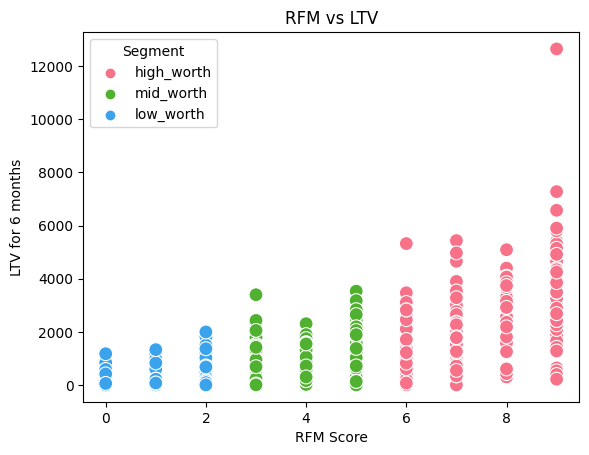

In [173]:
sns.scatterplot(data=tx_merge, x='OverallScore', y='m6_Revenue', hue='Segment', palette='husl', s=100, hue_order=['high_worth', 'mid_worth', 'low_worth'])
plt.xlabel('RFM Score')
plt.ylabel('LTV for 6 months')
plt.title('RFM vs LTV')
plt.show()

In [174]:
#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_merge[['m6_Revenue']])
tx_merge['LTVCluster'] = kmeans.predict(tx_merge[['m6_Revenue']])

#order cluster number based on LTV
tx_merge = order_cluster('LTVCluster', 'm6_Revenue',tx_merge,True)

#creatinga new cluster dataframe
tx_cluster = tx_merge.copy()

#see details of the clusters
tx_cluster.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,1622.0,336.477867,258.254948,0.00,108.7725,282.495,531.3000,921.46
1,712.0,1508.175098,443.827004,921.74,1119.4325,1408.920,1838.0500,2551.81
2,164.0,3629.017256,1150.565767,2572.51,2830.8675,3307.960,4093.3025,12651.57


In [178]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import xgboost as xgb

#convert categorical columns to numerical
tx_class = pd.get_dummies(tx_cluster)

#calculate and show correlations
corr_matrix = tx_class.corr()
corr_matrix['LTVCluster'].sort_values(ascending=False)

#create X and y, X will be feature set and y is the label - LTV
X = tx_class.drop(['LTVCluster','m6_Revenue'],axis=1)
y = tx_class['LTVCluster']

#split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)


In [179]:
#XGBoost Multiclassification Model
ltv_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1,objective= 'multi:softprob',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(ltv_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(ltv_xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = ltv_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 0.87
Accuracy of XGB classifier on test set: 0.82
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        89
           1       0.67      0.65      0.66        31
           2       0.50      0.20      0.29         5

    accuracy                           0.82       125
   macro avg       0.68      0.59      0.61       125
weighted avg       0.81      0.82      0.82       125

